In [12]:
import numpy as np
import pandas as pd
from numba import njit
from matplotlib import pyplot as plt
import itertools
from LKH import solve_lkh
import matplotlib.collections as mc
import math
import gurobipy as gp
from gurobipy import GRB, tupledict, tuplelist
import datetime
from common import config_to_string, solution_to_xy_config_dict, solution_to_submission, load_submission, evaluate_solution, is_valid
from rich.progress import track


In [13]:

# read image, transform to 2D look-up table (LUT)
image_df = pd.read_csv("image.csv")
IMAGE_LUT = (image_df + np.array([[128, 128, 0, 0, 0]])).to_numpy()  # only positive coordinates

image = np.zeros(shape=(257,257,3))
for x,y,r,g,b in IMAGE_LUT:
    image[int(x),int(y)] = [r,g,b]
    

im = plt.imread('image.png')
print(im.shape)

(257, 257, 3)


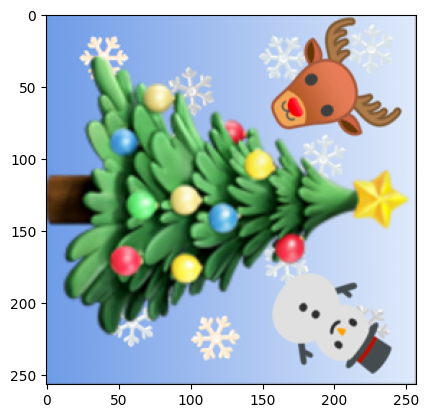

In [14]:
plt.imshow(image)

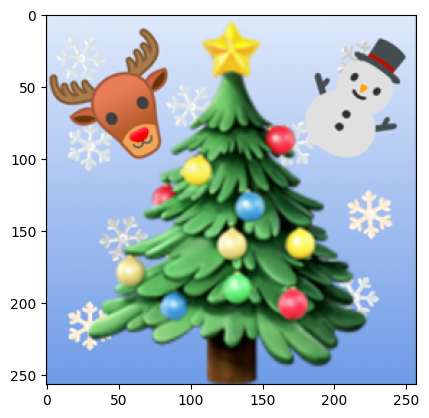

In [15]:
plt.imshow(im)

In [18]:
score_gtruth_sample_sub = 166305.28453  # the score of the sample submission according to leaderboard
sample_arr = load_submission("sample_submission.csv")
np.allclose(evaluate_solution(sample_arr), score_gtruth_sample_sub)  # correct cost calculated

Loaded solution from sample_submission.csv
	Length: (133604, 8, 2)
	Cost: 166305.28453791895


True

In [19]:
%%timeit
evaluate_solution(sample_arr)

14.8 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
submission79819 = load_submission("submission79819.csv")

In [ ]:
# 57, 115
xy_config79819 = solution_to_xy_config_dict(submission79819)

In [ ]:
submission79819[28522].sum(axis=0) + np.array([128, 128])

In [ ]:
xy_config79819[57-128, 145-128]

In [ ]:
for i in range(47,59):
    print(xy_config79819[i-128, 145-128])

In [ ]:
xy_config79819

In [ ]:
for i in range(-128,129):
    for j in range(-128,129):
        if len(pos_dict[(i,j)]) == 1:
            continue
        print(i,j, len(pos_dict[(i,j)]))

In [ ]:
new_arr = np.array([pos_dict[(0,0)][0]] + [
    pos_dict[(i,j)][0]
    for i in range(-128,129)
    for j in range(-128,129)
    if (i,j) != (0,0)
], dtype=int)

In [ ]:
new_arr2 = np.array([
        config 
        for config in sample_arr
        if np.all(pos_dict[tuple(sum(config))][0] == config)
]
)

In [ ]:
for config in sample_arr:
    print(config)
    print(config.shape)
    print(pos_dict[tuple(sum(config))][0])
    print(np.all(pos_dict[tuple(sum(config))][0] == config))
    break


In [ ]:
evaluate_config(new_arr[0:2])

In [ ]:
n_steps = new_arr3.shape[0]
n_steps

In [ ]:
n_steps = new_arr3.shape[0]

step_costs = [
    evaluate_config(new_arr3[i:i+2])
    for i in range(n_steps-1)
]

In [ ]:
heatmap = np.ones(shape=(257,257,3))

In [ ]:

plt.imshow(heatmap, interpolation='nearest')
plt.show()

In [ ]:
heatmap[0:10,0:10] = [1,0,0]
heatmap[0,0]

In [ ]:
min_cost = min(step_costs)
max_cost = max(step_costs)

print(min_cost, max_cost)
heatmap = np.ones(shape=(257,257))
for i in range(n_steps-1):
    (x,y) = sum(new_arr3[i+1])
    cost = evaluate_config(new_arr3[i:i+2])
    r = (cost-min_cost)/(max_cost-min_cost)
    heatmap[x,y] = cost

# plt.imshow(heatmap, interpolation='nearest')
plt.imshow(heatmap, cmap='hot')

plt.show()

In [ ]:
step_cost

In [ ]:
new_arr[0]

In [ ]:
new_arr[-1]

In [ ]:
def list_configs(x,y):
    
    l = 64
    arm_config = itertools.product(range(-l,l+1),[-l,l])

In [ ]:

configs_per_length = {
    l: [] for l in [1,2,4,8,16,32,64]
}
for l in [1,2,4,8,16,32,64]:
    i = 0
    print("[", end="")
    for config in itertools.product(range(-l+1,l),[-l,l]):
        i+=1
        configs_per_length[l].append(config)
        print(config, end=",")
    for config in itertools.product([-l,l],range(-l,l+1)):
        i+=1
        configs_per_length[l].append(config)
        print(config, end=",")
    print(f"]\t{i}")
    print()
    


In [ ]:
sorted(configs_per_length[1])

In [ ]:
# configs_per_length

# for config in configs_per_length[1]plt

plt.imshow(sorted(configs_per_length[4]), cmap='hot')

In [ ]:
pt_configs = {
    (x,y): []
    for x in range(-128,129)
    for y in range(-128,129)
}
heatmap = np.zeros(shape=[257,257])
for config in itertools.product(
    configs_per_length[1], 
    configs_per_length[1], 
    configs_per_length[2], 
    configs_per_length[4],
    configs_per_length[8],
    configs_per_length[16],
):
#     print(config)
#     print(np.sum(config, axis=0))
#     print(tuple(np.sum(config, axis=0)))
#     print(pt_configs[tuple(np.sum(config, axis=0))])
    xy = tuple(np.sum(config, axis=0))
#     pt_configs[xy].append(config)
    heatmap[xy[0]+128, xy[1]+128] += 1

In [ ]:
plt.imshow(heatmap, cmap='hot')

In [ ]:
for pt, configs in pt_configs.items():
    if configs:
        print(pt, len(configs))

In [ ]:
initial_config = np.array([
    [ 64   0],
 [-32   0],
 [-16   0],
 [ -8   0],
 [ -4   0],
 [ -2   0],
 [ -1   0],
 [ -1   0]
])

In [ ]:
pos_length = {
    0: 64,
    1: 32,
    2: 16,
    3: 8,
    4: 4,
    5: 2,
    6: 1,
    7: 1,
}

def get_neighbors(config):
    valid_configs = [
        [config[pos]]
        for pos in range(8)
    ]
    for pos in range(8):
        for x_step, y_step in [(-1,0), (0,-1), (1,0), (0,1)]:
            if abs(config[pos][0] + x_step) != pos_length[pos] and abs(config[pos][1] + y_step) != pos_length[pos]:
                continue
            if abs(config[pos][0] + x_step) > pos_length[pos] or abs(config[pos][1] + y_step) > pos_length[pos]:
                continue
            valid_configs[pos].append(np.array((config[pos][0] + x_step, config[pos][1] + y_step)))
    

    return itertools.product(
        valid_configs[0],
        valid_configs[1],
        valid_configs[2],
        valid_configs[3],
        valid_configs[4],
        valid_configs[5],
        valid_configs[6],
        valid_configs[7]
    )
   
print(new_submission[0])
i = 0
xy_coords = set()
for config in get_neighbors(new_submission[0]):
    i+=1
    print(config, np.sum(config, axis=0))
    xy_coords.add(tuple(np.sum(config, axis=0)))
print(f"Total neighbors: {i}")
print(sorted(xy_coords))

In [ ]:
np.abs(new_submission[0]-new_submission[1]).sum()

In [ ]:
initial_config = sample_arr[0]
covered = np.zeros(shape=(257,257))
print(initial_config)

new_submission = np.array([initial_config])
print(new_submission)

pos_length = {
    0: 64,
    1: 32,
    2: 16,
    3: 8,
    4: 4,
    5: 2,
    6: 1,
    7: 1,
}

cur_config = np.copy(initial_config)
cur_x, cur_y = np.sum(cur_config, axis=0)
covered[cur_x + 128, cur_y + 128] += 1
total_cost = 0
while np.sum(covered) < 257 * 257:
    print(f"Covered {np.sum(covered)} pixels, Cost={total_cost:.2f}")
    cur_x, cur_y = np.sum(cur_config, axis=0)
    cur_color = image[cur_x + 128, cur_y + 128]
    
    min_cost = 1e3
    min_config = None
    
    for new_config in get_neighbors(cur_config):
        new_config = np.array(new_config)
        new_x, new_y = np.sum(new_config, axis=0)
        if covered[new_x + 128, new_y + 128] > 0:
            continue
        config_cost = np.sqrt(np.abs(cur_config-new_config).sum())
        new_color = image[new_x, new_y]
        config_cost += 3 * np.sum(np.abs(new_color-cur_color))
        if config_cost < min_cost:
            min_cost = config_cost
            min_config = new_config
    
    if min_config is None:
        break
    total_cost += 1
    total_cost += min_cost

    print("min_config:", min_config)
    print("cur_config:", cur_config, np.sum(cur_config, axis=0))
    print("new_config:", new_config, np.sum(new_config, axis=0))
    new_submission = np.concatenate((new_submission, [new_config]), axis=0)
    
    min_x, min_y = np.sum(new_config, axis=0)
    covered[min_x + 128, min_y + 128] += 1
    cur_config = new_config
    print()
        
#     for x in range(0,257):
#         for y in range(0,257):
#             new_color = image[x, y]
#             print(cur_color)
#             print(new_color)
#             print(new_color-cur_color)
#             color_cost = np.sum(np.abs(new_color-cur_color))
            
print(new_submission.shape)

In [ ]:
evaluate_config(new_submission)

In [ ]:
new_submission.shape

In [ ]:
np.abs(new_submission[:2,:,:] - new_submission[1:2,:,:]).sum(axis=-1).sum(axis=-1)

In [ ]:
def reconfiguration_cost(from_config, to_config):
    nlinks = len(from_config)
    print(nlinks)
    diffs = np.abs(np.asarray(from_config) - np.asarray(to_config)).sum(axis=1)
    print(diffs)
    return np.sqrt(diffs.sum())

In [ ]:
reconfiguration_cost(new_submission[0], new_submission[1])

In [ ]:
new_submission[:2]

In [ ]:
np.unique([np.sum(config, axis=0).shape for config in new_submission])

In [ ]:
points = [np.sum(config, axis=0) for config in new_submission]
plot_traj(points, image)

In [ ]:
sample_arr.shape

In [ ]:
for config in new_submission:
    print(np.sum(config, axis=0))

In [ ]:
plt.imshow(image)

In [ ]:

config_pool = sample_submission

xy_positions = np.unique([np.sum(config, axis=0) for config in config_pool])



In [ ]:
    
atsp_solution = get_atsp_solution(config_pool=sample_arr[:10])
# solve_atsp(config_pool=sample_submission[:10], save_model=True)

print(atsp_solution)
print(evaluate_config(atsp_solution))

In [ ]:
atsp_solution = np.array(atsp_solution)

In [ ]:
atsp_solution

In [ ]:
print(evaluate_config(new_arr))

In [ ]:
sample_arr


In [ ]:
plt.imshow(image)

In [ ]:
blue_mask = image[:,:,2] < 0.892
blue_image = np.copy(image)
blue_image[blue_mask] = 0
plt.imshow(blue_image)

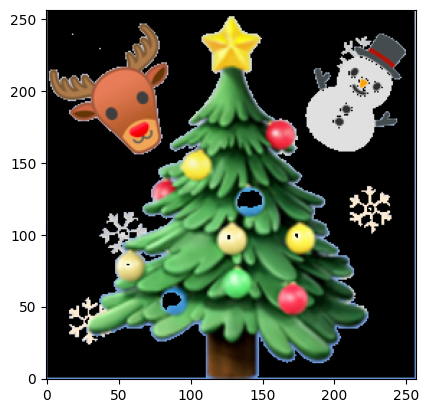

In [23]:
non_blue_mask = image[:,:,2] >= 0.892
non_blue_image = np.copy(image)
non_blue_image[non_blue_mask] = 0
plt.imshow(non_blue_image.transpose(1,0,2), origin='lower')

In [ ]:
# reindeer = non blue and x < 85 and y > 103
masks = {
    'blue': image[:,:,2] >= 0.892,
    'non-blue': image[:,:,2] >= 0.892,
    'reindeer': 
}

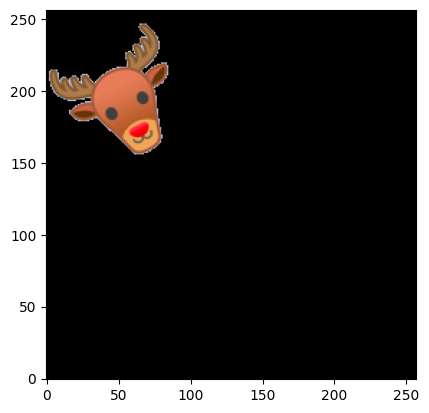

In [20]:
reindeer_mask = image[:,:,2] < 0.892
reindeer_mask[85:] = False
reindeer_mask[:, :257-103] = False
reindeer_mask[:51, 257-35:] = False
reindeer_mask[:2] = False

reindeer = np.copy(image)
reindeer[np.invert(reindeer_mask)] = 0
plt.imshow(reindeer.transpose(1,0,2), origin='lower')

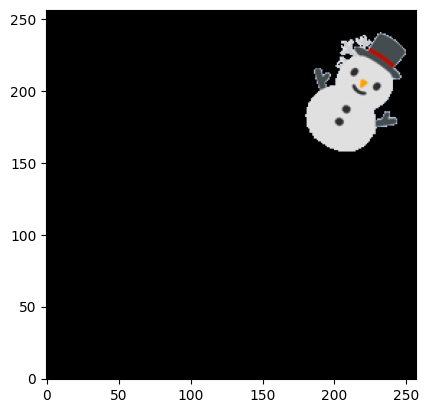

In [24]:
snowman_mask = image[:,:,2] < 0.892

snowman_mask[:175] = False
snowman_mask[:, :257-103] = False
snowman_mask[190:257, 170:250] = True
snowman_mask[image[:,:,2] > 0.95] = False
snowman_mask[250:] = False


snowman = np.copy(image)
snowman[np.invert(snowman_mask)] = 0
plt.imshow(snowman.transpose(1,0,2), origin='lower')

# plt.imshow(snowman_mask.transpose(1,0), origin='lower')

In [ ]:
#  plt.imshow(reindeer_mask.transpose(1,0), origin='lower')
plt.imshow(blue_mask.transpose(1,0), origin='lower')

In [ ]:
star9_mask = image[:,:,0] >= 0.733
star9_mask[:200] = False
star9_mask[240:] = False
star9_mask[:, :100] = False
star9_mask[:, 150:] = False

star9 = np.copy(image)
star9[np.invert(star9_mask)] = 0
plt.imshow(star9.transpose(1,0,2), origin='lower')

In [ ]:
blue_mask = image[:,:,2] >= 0.892
blue_mask[star9_mask] = True
blue_mask[snowman_mask] = False
blue_mask[reindeer_mask] = False
blue_mask[60:120, 40:65] = False
blue_mask[100:170, 90:150] = False
blue_mask[150:185, 90:110] = False

# blue_mask[image[:,:,2] >= 0.892] = True

blue = np.copy(image)
blue[np.invert(blue_mask)] = 0
plt.imshow(blue.transpose(1,0,2), origin='lower')


In [ ]:
tree_mask = image[:,:,2] < 0.892
tree_mask[blue_mask] = False
tree_mask[reindeer_mask] = False
tree_mask[snowman_mask] = False
tree_mask[60:120, 40:65] = True
tree_mask[100:170, 90:150] = True
tree_mask[150:185, 90:110] = True

# tree_mask[image[:,:,2] > 0.95] = False

tree = np.copy(image)
tree[np.invert(tree_mask)] = 0
plt.imshow(tree.transpose(1,0,2), origin='lower')

# plt.imshow(snowman_mask.transpose(1,0), origin='lower')

In [ ]:
blue_mask
blue_region = np.array([idx for idx, x in np.ndenumerate(blue_mask) if x])

In [ ]:
reindeer_region = set(tuple([idx[0]-128, idx[1]-128]) for idx, x in np.ndenumerate(reindeer_mask) if x)

reindeer_configs = np.array([
    config 
    for config in sample_arr 
    if tuple(np.sum(config, axis=0)) in reindeer_region
])

print(len(reindeer_region))
print(reindeer_configs.shape)

In [ ]:
solution = get_atsp_solution(reindeer_configs)

In [ ]:
solution_to_submission(reindeer_configs)

In [ ]:
print(np.sum(reindeer_configs[0], axis=0))

In [ ]:
[
    tuple(np.sum(config, axis=0)) 
    for config in sample_arr 
]

In [ ]:
reindeer_region
(75, 179) in reindeer_region

In [ ]:
solution = get_atsp_solution(blue_configs)

In [ ]:
blue_configs = np.array([config for config in sample_arr if np.sum(config, axis=0) in blue_region])

In [ ]:
np.where(np.sum(blue_configs, axis=0) > 0)

In [ ]:
blue_configs.shape

In [ ]:
blue_configs.shape

In [ ]:
solution = get_atsp_solution(blue_configs)

In [ ]:
evaluate_config(solution)

In [ ]:
sample_arr.shape

In [ ]:
# def shortest_path(config1, config2, config_pool):
i = 0
print(INITIAL_CONFIG)
for n in get_neighbors(INITIAL_CONFIG):
    print(n)
    print(np.sum(n, axis=0))
    print(np.abs(n-INITIAL_CONFIG).sum())
    # assert np.abs(n-INITIAL_CONFIG).sum().max() == np.abs(np.sum(n, axis=0)).max()
    i += 1
print(i)

config = np.array(
    [[64, 0],
    [-32, 0],
    [-16, 0],
    [-8, 12],
    [-4, 0],
    [-2, 10],
    [-1, 0],
    [-1, 0]]
)

print(shortest_path(INITIAL_CONFIG, config))

In [ ]:
solution_mip = solve_atsp()

In [ ]:
fixed_solution = new_solution[:1]
for i in range(1,new_solution.shape[0]):
    reconfig_cost = np.abs(new_solution[i]-new_solution[i-1]).max(axis=-1).max()
    if reconfig_cost > 1:
        print(i)
        new_segment = np.tile(new_solution[i-1].copy(), (reconfig_cost,1,1))
        step = (new_solution[i]-new_solution[i-1]) / reconfig_cost
        for j in range(reconfig_cost):
            new_segment[j] = np.ceil((new_segment[j] + (j+1)*step))
        fixed_solution = np.concatenate((fixed_solution, new_segment))
    elif np.any(new_solution[i-1] != new_solution[i]):
        fixed_solution = np.concatenate((fixed_solution, np.array([new_solution[i]])))
print(new_solution.shape)
print(evaluate_config(new_solution))
print(fixed_solution.shape)
print(evaluate_config(fixed_solution))

In [ ]:
visited = set()
arm_dist = np.array([64,32,16,8,4,2,1,1])
for i in range(1,new_solution.shape[0]):
    visited.add(tuple(fixed_solution[i].sum(axis=0)))
    reconfig_cost = np.abs(fixed_solution[i]-fixed_solution[i-1]).max(axis=-1).max()
    if reconfig_cost > 1:
        print(i)
    config_dists = np.abs(fixed_solution[i]).max(axis=-1)
    if np.any(config_dists != arm_dist):
        print(i)
print(fixed_solution.shape)
print(visited)
print(len(visited))

In [ ]:
solution_to_submission(fixed_solution)

In [ ]:
np.array_str(solution[0])

In [ ]:
solution = load_submission("submission79819.csv")

In [62]:
from common import is_valid
def adjacency_dict(config_pool):
    #
    xy_config_dict = solution_to_xy_config_dict(config_pool)
    print("xy_config_dict created")
    N = {
        np.array2string(i): np.empty((0,8,2))
        for i in config_pool
    }
    print("empty N created")

    for i in track(config_pool):
        xi,yi = i.sum(axis=0)
        for delta_x in range(-8,9):
            for delta_y in range(-8+abs(delta_x), 9-abs(delta_x)):
                xj = xi+delta_x
                if xj < -128 or xj > 128:
                    continue
                yj = yi+delta_y
                if yj < -128 or yj > 128:
                    continue
                for _, j in xy_config_dict[(xj,yj)]:
                    if not is_valid(i,j):
                        continue
                    N[np.array2string(i)] = np.unique(np.vstack([N[np.array2string(i)], j.reshape(1,8,2)]), axis=0)
                    N[np.array2string(j)] = np.unique(np.vstack([N[np.array2string(j)], i.reshape(1,8,2)]), axis=0)
    return N

In [26]:
solution = load_submission("submission82425.csv")

Loaded solution from submission82425.csv
	Length: (67272, 8, 2)
	Cost: 82415.5782020046


In [27]:
xy_config_dict = solution_to_xy_config_dict(solution)

xy_config_dict[(0,0)]

[(0,
  array([[ 64,   0],
         [-32,   0],
         [-16,   0],
         [ -8,   0],
         [ -4,   0],
         [ -2,   0],
         [ -1,   0],
         [ -1,   0]])),
 (33527,
  array([[ 64, -64],
         [-32,  32],
         [-16,  16],
         [ -8,   8],
         [ -4,   4],
         [ -2,   2],
         [ -1,   1],
         [ -1,   1]])),
 (33910,
  array([[-64,  63],
         [ 32, -31],
         [ 16, -16],
         [  8,  -8],
         [  4,  -4],
         [  2,  -2],
         [  1,  -1],
         [  1,  -1]])),
 (67271,
  array([[ 64,   0],
         [-32,   0],
         [-16,   0],
         [ -8,   0],
         [ -4,   0],
         [ -2,   0],
         [ -1,   0],
         [ -1,   0]]))]

In [28]:
print(np.empty((0,8,2)).shape)

(0, 8, 2)


In [37]:
np.empty((0,8,2))

array([], shape=(0, 8, 2), dtype=float64)

In [61]:
np.unique(np.vstack([np.ones((1,8,2)), np.ones((1,8,2)), 2*np.ones((8,2)).reshape((1,8,2))]), axis=0)

array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.]]])

In [ ]:
N = adjacency_dict(solution)

xy_config_dict created
empty N created


Output()

In [ ]:
a = np.array(N['[[ 64   0]\n [-32   0]\n [-16   0]\n [ -8   0]\n [ -4   0]\n [ -2   0]\n [ -1   0]\n [ -1   0]]'])

In [ ]:
a.shape

In [ ]:
np.unique(a, axis=0)

In [ ]:
xy_config_dict = solution_to_xy_config_dict(solution)

In [ ]:
solution[0]

In [ ]:
for i, n in N.items():
    print(i, n)
    break